In [68]:
from sqlalchemy import create_engine
import api_keys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [69]:
24 * 60 / 5

288.0

In [25]:
DB_USER = api_keys.DB_USER
DB_PASS = api_keys.DB_PASS
DB_URL = api_keys.DB_URL

engine = create_engine("mysql+pymysql://{0}:{1}@{2}".format(DB_USER, DB_PASS, DB_URL), echo=True) 
connection = engine.connect()

statement = """SELECT * FROM dublin_bikes.availability, dublin_bikes.weather_current
where availability.number = 2 && weather_current.station_number = 2 && timestampdiff(MINUTE,availability.time_queried, weather_current.time_queried) < 5 && timestampdiff(MINUTE,availability.time_queried, weather_current.time_queried) > 0
""" # create select statement for stations table

2021-03-27 12:51:35,372 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-03-27 12:51:35,373 INFO sqlalchemy.engine.base.Engine {}
2021-03-27 12:51:35,494 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-03-27 12:51:35,495 INFO sqlalchemy.engine.base.Engine {}
2021-03-27 12:51:35,733 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-03-27 12:51:35,735 INFO sqlalchemy.engine.base.Engine {}
2021-03-27 12:51:35,971 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-03-27 12:51:35,972 INFO sqlalchemy.engine.base.Engine {}
2021-03-27 12:51:36,099 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-03-27 12:51:36,101 INFO sqlalchemy.engine.base.Engine {}
2021-03-27 12:51:36,220 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-03-27 12:51:36,221 INFO sqlalchemy.engine.base.E

Exception during reset or similar
Traceback (most recent call last):
  File "/home/invicta117/miniconda3/envs/mydublinbikes/lib/python3.9/site-packages/pymysql/connections.py", line 732, in _read_bytes
    data = self._rfile.read(num_bytes)
  File "/home/invicta117/miniconda3/envs/mydublinbikes/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
ConnectionResetError: [Errno 104] Connection reset by peer

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/invicta117/miniconda3/envs/mydublinbikes/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 697, in _finalize_fairy
    fairy._reset(pool)
  File "/home/invicta117/miniconda3/envs/mydublinbikes/lib/python3.9/site-packages/sqlalchemy/pool/base.py", line 893, in _reset
    pool._dialect.do_rollback(self)
  File "/home/invicta117/miniconda3/envs/mydublinbikes/lib/python3.9/site-packages/sqlalchemy/dialects/mysql/base.py", line 2509, i

In [26]:
df = pd.read_sql_query(statement, engine) # https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe

2021-03-27 12:51:38,880 INFO sqlalchemy.engine.base.OptionEngine SELECT * FROM dublin_bikes.availability, dublin_bikes.weather_current
where availability.number = 2 && weather_current.station_number = 2 && timestampdiff(MINUTE,availability.time_queried, weather_current.time_queried) < 5 && timestampdiff(MINUTE,availability.time_queried, weather_current.time_queried) > 0

2021-03-27 12:51:38,881 INFO sqlalchemy.engine.base.OptionEngine {}


In [27]:
print("Mb:", sys.getsizeof(df)/ (2 ** 20))

Mb: 2.0161924362182617


In [28]:
df.head(5)

,number,available_bikes,available_bike_stands,last_update,station_status,time_queried,station_number,time_queried,last_update,temp,feels_like,pressure,humidity,visibility,wind_speed,wind_deg,weather_main,weather_description
0,2,10,10,2021-02-25 17:21:00,OPEN,2021-02-25 17:22:34,2,2021-02-25 17:24:24,2021-02-25 17:24:17,282,278,1029,66.0,10000,3,240,Clouds,scattered clouds
1,2,10,10,2021-02-25 17:21:00,OPEN,2021-02-25 17:27:35,2,2021-02-25 17:29:45,2021-02-25 17:29:43,281,278,1029,66.0,10000,3,240,Clouds,scattered clouds
2,2,9,11,2021-02-25 17:30:22,OPEN,2021-02-25 17:32:37,2,2021-02-25 17:34:56,2021-02-25 17:34:54,281,278,1029,66.0,10000,3,240,Clouds,scattered clouds
3,2,9,11,2021-02-25 17:30:22,OPEN,2021-02-25 17:37:38,2,2021-02-25 17:40:08,2021-02-25 17:40:06,281,278,1029,66.0,10000,3,240,Clouds,scattered clouds
4,2,9,11,2021-02-25 17:40:30,OPEN,2021-02-25 17:42:39,2,2021-02-25 17:45:19,2021-02-25 17:45:18,281,277,1029,66.0,10000,4,270,Clouds,scattered clouds


In [29]:
df.dtypes

number                            int64
available_bikes                   int64
available_bike_stands             int64
last_update                      object
station_status                   object
time_queried             datetime64[ns]
station_number                    int64
time_queried             datetime64[ns]
last_update              datetime64[ns]
temp                              int64
feels_like                        int64
pressure                          int64
humidity                        float64
visibility                        int64
wind_speed                        int64
wind_deg                          int64
weather_main                     object
weather_description              object
dtype: object

In [30]:
categorical_columns = df[['weather_description','weather_main','station_number','number','station_status']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  

continuous_columns = df.select_dtypes(['int64']).columns
datetime_columns = df.select_dtypes(['datetime64[ns]']).columns

df.dtypes

number                         category
available_bikes                   int64
available_bike_stands             int64
last_update                      object
station_status                 category
time_queried             datetime64[ns]
station_number                 category
time_queried             datetime64[ns]
last_update              datetime64[ns]
temp                              int64
feels_like                        int64
pressure                          int64
humidity                        float64
visibility                        int64
wind_speed                        int64
wind_deg                          int64
weather_main                   category
weather_description            category
dtype: object

In [41]:
df["humidity"] = df["humidity"].fillna(0)

In [42]:
df.corr()

,available_bikes,available_bike_stands,temp,feels_like,pressure,humidity,visibility,wind_speed,wind_deg
available_bikes,1.000000,-0.968355,0.008398,0.078334,0.219459,0.296306,0.058027,-0.118045,-0.019529
available_bike_stands,-0.968355,1.000000,-0.004002,-0.075692,-0.224739,-0.329574,-0.000475,0.122191,0.054362
temp,0.008398,-0.004002,1.000000,0.846117,0.001643,-0.275699,0.278980,0.300903,0.296729
feels_like,0.078334,-0.075692,0.846117,1.000000,0.367060,-0.044668,0.154118,-0.223915,0.127283
pressure,0.219459,-0.224739,0.001643,0.367060,1.000000,0.398426,-0.124552,-0.682879,-0.189731
humidity,0.296306,-0.329574,-0.275699,-0.044668,0.398426,1.000000,-0.489713,-0.424856,-0.436943
visibility,0.058027,-0.000475,0.278980,0.154118,-0.124552,-0.489713,1.000000,0.197122,0.350280
wind_speed,-0.118045,0.122191,0.300903,-0.223915,-0.682879,-0.424856,0.197122,1.000000,0.356700
wind_deg,-0.019529,0.054362,0.296729,0.127283,-0.189731,-0.436943,0.350280,0.356700,1.000000


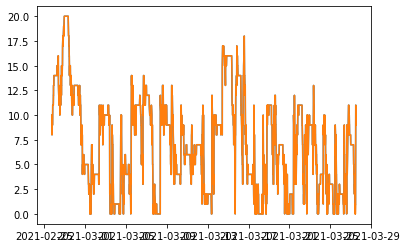

In [43]:
plt.plot(df["time_queried"],df["available_bikes"])

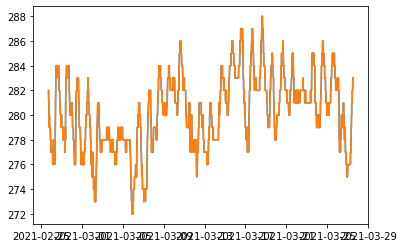

In [44]:
plt.plot(df["time_queried"],df["temp"])

In [ ]:
weather_dummies = pd.get_dummies(df['weather_main'], prefix='weather_main', drop_first=True)

In [52]:
df = pd.get_dummies(df, drop_first=True)

In [53]:
df.head(5)

,available_bikes,available_bike_stands,time_queried,time_queried,last_update,temp,feels_like,pressure,humidity,visibility,...,weather_description_clear sky,weather_description_few clouds,weather_description_fog,weather_description_heavy intensity rain,weather_description_light intensity drizzle,weather_description_light rain,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_scattered clouds
0,10,10,2021-02-25 17:22:34,2021-02-25 17:24:24,2021-02-25 17:24:17,282,278,1029,66.0,10000,...,0,0,0,0,0,0,0,0,0,1
1,10,10,2021-02-25 17:27:35,2021-02-25 17:29:45,2021-02-25 17:29:43,281,278,1029,66.0,10000,...,0,0,0,0,0,0,0,0,0,1
2,9,11,2021-02-25 17:32:37,2021-02-25 17:34:56,2021-02-25 17:34:54,281,278,1029,66.0,10000,...,0,0,0,0,0,0,0,0,0,1
3,9,11,2021-02-25 17:37:38,2021-02-25 17:40:08,2021-02-25 17:40:06,281,278,1029,66.0,10000,...,0,0,0,0,0,0,0,0,0,1
4,9,11,2021-02-25 17:42:39,2021-02-25 17:45:19,2021-02-25 17:45:18,281,277,1029,66.0,10000,...,0,0,0,0,0,0,0,0,0,1


In [55]:
# Prepare the descriptive features
#print(df.head(10))
cont_features = ['temp', 'wind_speed', 'pressure', 'humidity']
categ_features = weather_dummies.columns.values.tolist()
features = cont_features + categ_features
X = df[features]
y = df.available_bikes

print("\nDescriptive features in X:\n", X)
print("\nTarget feature in y:\n", y)


Descriptive features in X:
       temp  wind_speed  pressure  humidity  weather_main_Clouds  \
0      282           3      1029      66.0                    1   
1      281           3      1029      66.0                    1   
2      281           3      1029      66.0                    1   
3      281           3      1029      66.0                    1   
4      281           4      1029      66.0                    1   
...    ...         ...       ...       ...                  ...   
5854   282           6      1016       0.0                    1   
5855   283           8      1016       0.0                    1   
5856   283           8      1016       0.0                    1   
5857   283           8      1015       0.0                    1   
5858   283           8      1015       0.0                    1   

      weather_main_Drizzle  weather_main_Fog  weather_main_Mist  \
0                        0                 0                  0   
1                        0      

In [56]:
linreg = LinearRegression().fit(X, y)

In [59]:
# Use more features for training
# Train aka fit, a model using all continuous features.

linreg = LinearRegression().fit(X[features], y)

# Print the weights learned for each feature.
print("Features: \n", features)
print("Coeficients: \n", linreg.coef_)
print("\nIntercept: \n", linreg.intercept_)

Features: 
 ['temp', 'wind_speed', 'pressure', 'humidity', 'weather_main_Clouds', 'weather_main_Drizzle', 'weather_main_Fog', 'weather_main_Mist', 'weather_main_Rain']
Coeficients: 
 [-0.03873001  0.18752519  0.05736284  0.05779814  2.64143405  5.8695673
 -4.57321925 -2.67702588  2.68017521]

Intercept: 
 -44.80847780228268


In [60]:
linreg_predictions = linreg.predict(X[features])

print("\nPredictions with linear regression: \n")
actual_vs_predicted_linreg = pd.concat([y, pd.DataFrame(linreg_predictions, columns=['Predicted'], index=y.index)], axis=1)
print(actual_vs_predicted_linreg)


Predictions with linear regression: 

      available_bikes  Predicted
0                  10  10.314704
1                  10  10.353434
2                   9  10.353434
3                   9  10.353434
4                   9  10.540960
...               ...        ...
5854               10   6.316886
5855               10   6.653206
5856                9   6.653206
5857                9   6.595844
5858                9   6.595844

[5859 rows x 2 columns]


In [61]:
#This function is used repeatedly to compute all metrics
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    #print("MSE: ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))
        

In [62]:
printMetrics(y, linreg_predictions)


MAE:  3.4517441335705383
RMSE:  4.209254248100388
R2:  0.2160621715964528


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
       temp  wind_speed  pressure  humidity  weather_main_Clouds  \
4745   282           3      1026       0.0                    1   
2902   277           7       982       0.0                    1   
246    281           3      1036      81.0                    1   
2177   281           3      1020       0.0                    1   
3669   278           4      1037       0.0                    0   
...    ...         ...       ...       ...                  ...   
4931   281           4      1019       0.0                    1   
3264   282           8      1017       0.0                    1   
1653   277           3      1033       0.0                    1   
2607   279           6       990       0.0                    1   
2732   277           9       997       0.0                    0   

      weather_main_Drizzle  weather_main_Fog  weather_main_Mist  \
4745                     0                 0                  0   
2902                     0                 0 

In [64]:
# Train on the training sample and test on the test sample.
linreg = LinearRegression().fit(X_train, y_train)
# Print the weights learned for each feature.
#print(linreg_train.coef_)
print("Features and coeficients:", list(zip(features, linreg.coef_)))

Features and coeficients: [('temp', -0.04512603781620762), ('wind_speed', 0.20461908730789266), ('pressure', 0.05763613747513866), ('humidity', 0.06048663145563027), ('weather_main_Clouds', 2.6531999746328196), ('weather_main_Drizzle', 5.7819303685220715), ('weather_main_Fog', -4.949314603943506), ('weather_main_Mist', -2.9914793037889784), ('weather_main_Rain', 2.4857594231167908)]


In [65]:
X_train

,temp,wind_speed,pressure,humidity,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Mist,weather_main_Rain
4745,282,3,1026,0.0,1,0,0,0,0
2902,277,7,982,0.0,1,0,0,0,0
246,281,3,1036,81.0,1,0,0,0,0
2177,281,3,1020,0.0,1,0,0,0,0
3669,278,4,1037,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4931,281,4,1019,0.0,1,0,0,0,0
3264,282,8,1017,0.0,1,0,0,0,0
1653,277,3,1033,0.0,1,0,0,0,0
2607,279,6,990,0.0,1,0,0,0,0


In [66]:
# Predicted price on training set
train_predictions = linreg.predict(X_train)
print("Actual vs predicted on training:\n", pd.concat([y_train, pd.DataFrame(train_predictions, columns=['Predicted'], index=y_train.index)], axis=1))
printMetrics(y_train, train_predictions)

Actual vs predicted on training:
       available_bikes  Predicted
4745                2   6.281744
2902                1   4.789861
246                18  11.802649
2177               11   5.981053
3669                4   4.647665
...               ...        ...
4931                7   6.128036
3264               16   6.786114
1653                3   6.910827
2607                7   4.956078
2732                7   5.896200

[4101 rows x 2 columns]

MAE:  3.4529215802155666
RMSE:  4.218454298609191
R2:  0.22515529201855833


In [67]:
# Predicted price on test set
test_predictions = linreg.predict(X_test)
print("Actual vs predicted on test:\n", pd.concat([y_test, pd.DataFrame(test_predictions, columns=['Predicted'], index=y_test.index)], axis=1))
printMetrics(y_test, test_predictions)

Actual vs predicted on test:
       available_bikes  Predicted
2682                6   5.315311
3585                8   4.727605
527                13  12.324774
1216                9   6.558098
4626               10   6.295159
...               ...        ...
3931                4   7.323169
2472                6   4.965873
57                 14  11.910909
2806               10   5.825500
3241               16   6.887971

[1758 rows x 2 columns]

MAE:  3.4304562833596037
RMSE:  4.192265173430302
R2:  0.19187400589435244
